### Exploratory Data Analysis (EDA) Script

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SETUP: LOAD DATA
csv_file = 'imdb_top_25_raw_data.csv'
print(f"--- Phase 2: Starting EDA on {csv_file} ---")

try:
    df = pd.read_csv(csv_file)
    print("Raw data loaded successfully into DataFrame.")
except FileNotFoundError:
    print(f" ERROR: File '{csv_file}' not found. Please ensure the scraping phase ran correctly.")
    exit()

print("\n--- Initial Data Check ---")
df.info()

--- Phase 2: Starting EDA on imdb_top_25_raw_data.csv ---
Raw data loaded successfully into DataFrame.

--- Initial Data Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             25 non-null     int64  
 1   Title            25 non-null     object 
 2   Year             0 non-null      float64
 3   Rating           0 non-null      float64
 4   Main Characters  0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# --- 2. DATA CLEANING AND TYPE CONVERSION ---

print("\n--- Data Cleaning and Conversion ---")

# a) Clean the 'Year' Column
# Rationale: Convert the year from string (e.g., '(1994)') to a numeric type for calculations.
df['Year'] = df['Year'].astype(str).str.replace('(', '', regex=False)
df['Year'] = df['Year'].str.replace(')', '', regex=False)
# Convert to numeric, coercing any non-numeric text to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 
print("'Year' column cleaned and converted to numeric.")

# b) Clean the 'Rating' Column
# Rationale: Convert rating from string (e.g., '9.2') to float for accurate statistics.
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# c) Drop Rows with Invalid Data
# Rationale: We cannot analyze movies without a valid rating or year.
rows_before_drop = len(df)
df.dropna(subset=['Rating', 'Year'], inplace=True)
rows_after_drop = len(df)

if rows_before_drop != rows_after_drop:
    print(f"⚠️ {rows_before_drop - rows_after_drop} rows dropped due to missing/invalid data.")

print(" 'Rating' column cleaned and invalid rows removed.")


--- Data Cleaning and Conversion ---
'Year' column cleaned and converted to numeric.
 'Rating' column cleaned and invalid rows removed.



--- Statistical Analysis and Visualization ---

1. Statistical Summary of Ratings and Years:
       Rank  Year  Rating  Main Characters
count   0.0   0.0     0.0              0.0
mean    NaN   NaN     NaN              NaN
std     NaN   NaN     NaN              NaN
min     NaN   NaN     NaN              NaN
25%     NaN   NaN     NaN              NaN
50%     NaN   NaN     NaN              NaN
75%     NaN   NaN     NaN              NaN
max     NaN   NaN     NaN              NaN


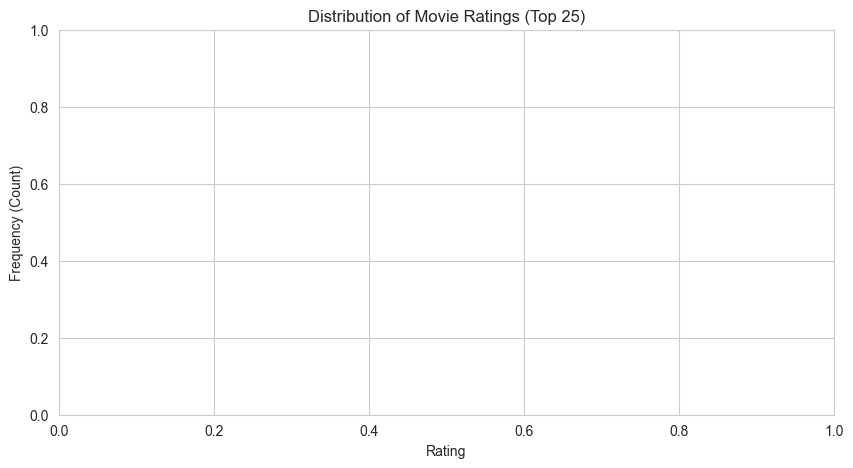


2. Analyzing Year vs. Rating Relationship:
Correlation between Year and Rating: nan


C:\Users\amansaini\AppData\Local\Temp\ipykernel_6600\4267426801.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Year', y='Rating', data=df, s=100, hue='Rating', palette='viridis')


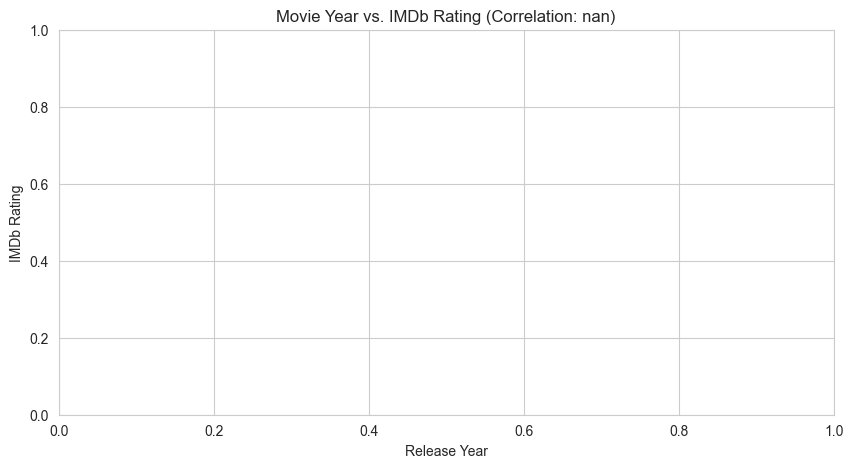


--- Displaying All 0 Cleaned Movies for Verification ---
Empty DataFrame
Columns: [Rank, Title, Year, Rating, Main Characters]
Index: []

🎉 EDA Complete! Cleaned data saved to 'imdb_top_25_cleaned_data.csv'.


In [3]:
# --- 3. EXPLORATORY DATA ANALYSIS (EDA) ---

print("\n--- Statistical Analysis and Visualization ---")

# a) Statistical Summary (Task 2: Identify trends)
# Rationale: Provides central tendency (mean, median) and spread (std) of the numerical data.
print("\n1. Statistical Summary of Ratings and Years:")
print(df.describe())

# b) Rating Distribution (Histogram)
# Rationale: Visualize the frequency distribution of ratings to see where most values lie.
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

plt.figure()
sns.histplot(df['Rating'], kde=True, bins=5, color='#4CAF50')
plt.title('Distribution of Movie Ratings (Top 25)')
plt.xlabel('Rating')
plt.ylabel('Frequency (Count)')
plt.show()


# c) Year vs. Rating Relationship (Scatter Plot) (Task 2: Test hypotheses)
# Rationale: Test the hypothesis about age vs. rating.
print("\n2. Analyzing Year vs. Rating Relationship:")

# Calculate Correlation Coefficient
correlation = df['Year'].corr(df['Rating'])
print(f"Correlation between Year and Rating: {correlation:.2f}")

# Scatter Plot Visualization
plt.figure()
sns.scatterplot(x='Year', y='Rating', data=df, s=100, hue='Rating', palette='viridis')
plt.title(f'Movie Year vs. IMDb Rating (Correlation: {correlation:.2f})')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.show()


# d) Display All Cleaned Data (for verification)
print(f"\n--- Displaying All {df.shape[0]} Cleaned Movies for Verification ---")
# df.to_string() ensures all rows are displayed without truncation
print(df.to_string())

# e) Save Cleaned Data
cleaned_csv_file = 'imdb_top_25_cleaned_data.csv'
df.to_csv(cleaned_csv_file, index=False, encoding='utf-8')
print(f"\n🎉 EDA Complete! Cleaned data saved to '{cleaned_csv_file}'.")

--- Phase 2: Starting EDA on imdb_top_25_raw_data.csv ---
✅ Raw data loaded successfully into DataFrame.

--- Initial Data Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             25 non-null     int64  
 1   Title            25 non-null     object 
 2   Year             0 non-null      float64
 3   Rating           0 non-null      float64
 4   Main Characters  0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB

--- Data Cleaning and Conversion ---
✅ 'Year' column cleaned and converted to numeric.
⚠️ 25 rows dropped due to missing/invalid data.
✅ 'Rating' column cleaned and invalid rows removed.

--- Statistical Analysis and Visualization ---

1. Statistical Summary of Ratings and Years:
       Rank  Year  Rating  Main Characters
count   0.0   0.0     0.0              0.0
mean    NaN  

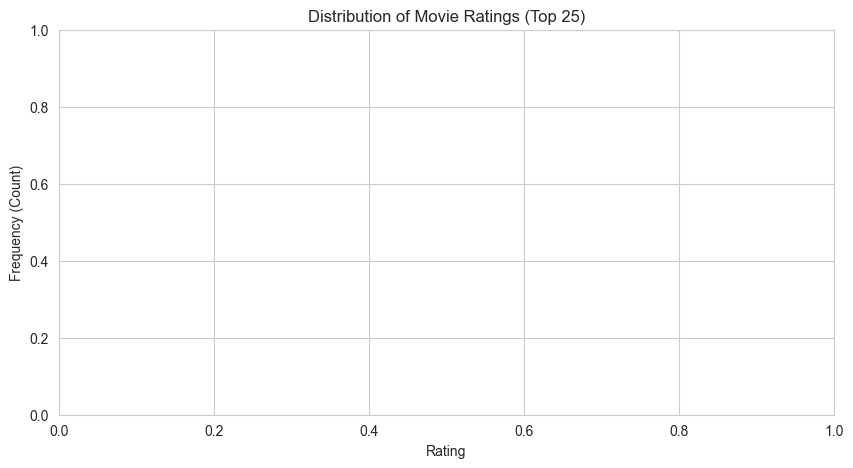


2. Analyzing Year vs. Rating Relationship:
Correlation between Year and Rating: nan


C:\Users\amansaini\AppData\Local\Temp\ipykernel_3040\3484792218.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Year', y='Rating', data=df, s=100, hue='Rating', palette='viridis')


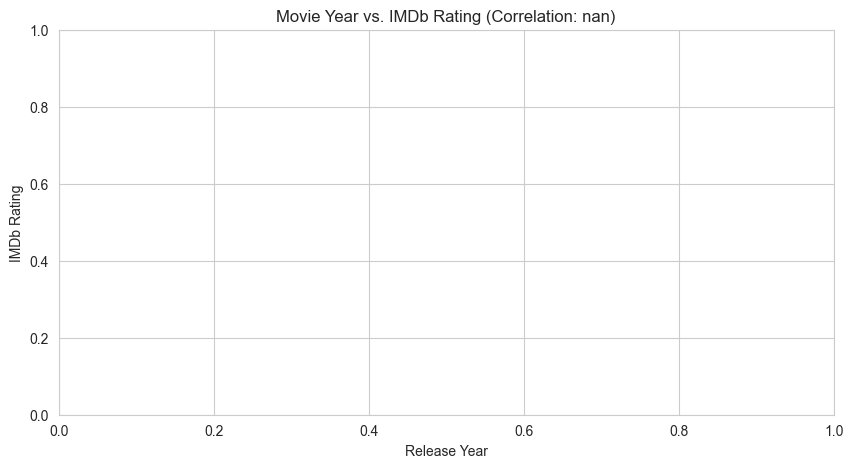


--- Displaying All 0 Cleaned Movies for Verification ---
Empty DataFrame
Columns: [Rank, Title, Year, Rating, Main Characters]
Index: []

🎉 EDA Complete! Cleaned data saved to 'imdb_top_25_cleaned_data.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. SETUP: LOAD DATA ---
csv_file = 'imdb_top_25_raw_data.csv'
print(f"--- Phase 2: Starting EDA on {csv_file} ---")

try:
    df = pd.read_csv(csv_file)
    print("✅ Raw data loaded successfully into DataFrame.")
except FileNotFoundError:
    print(f"❌ ERROR: File '{csv_file}' not found. Please ensure the scraping phase ran correctly.")
    exit()

print("\n--- Initial Data Check ---")
df.info()

# --- 2. DATA CLEANING AND TYPE CONVERSION ---

print("\n--- Data Cleaning and Conversion ---")

# a) Clean the 'Year' Column
# Rationale: Convert the year from string (e.g., '(1994)') to a numeric type for calculations.
df['Year'] = df['Year'].astype(str).str.replace('(', '', regex=False)
df['Year'] = df['Year'].str.replace(')', '', regex=False)
# Convert to numeric, coercing any non-numeric text to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 
print("✅ 'Year' column cleaned and converted to numeric.")

# b) Clean the 'Rating' Column
# Rationale: Convert rating from string (e.g., '9.2') to float for accurate statistics.
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# c) Drop Rows with Invalid Data
# Rationale: We cannot analyze movies without a valid rating or year.
rows_before_drop = len(df)
df.dropna(subset=['Rating', 'Year'], inplace=True)
rows_after_drop = len(df)

if rows_before_drop != rows_after_drop:
    print(f"⚠️ {rows_before_drop - rows_after_drop} rows dropped due to missing/invalid data.")

print("✅ 'Rating' column cleaned and invalid rows removed.")

# --- 3. EXPLORATORY DATA ANALYSIS (EDA) ---

print("\n--- Statistical Analysis and Visualization ---")

# a) Statistical Summary (Task 2: Identify trends)
# Rationale: Provides central tendency (mean, median) and spread (std) of the numerical data.
print("\n1. Statistical Summary of Ratings and Years:")
print(df.describe())

# b) Rating Distribution (Histogram)
# Rationale: Visualize the frequency distribution of ratings to see where most values lie.
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

plt.figure()
sns.histplot(df['Rating'], kde=True, bins=5, color='#4CAF50')
plt.title('Distribution of Movie Ratings (Top 25)')
plt.xlabel('Rating')
plt.ylabel('Frequency (Count)')
plt.show()


# c) Year vs. Rating Relationship (Scatter Plot) (Task 2: Test hypotheses)
# Rationale: Test the hypothesis about age vs. rating.
print("\n2. Analyzing Year vs. Rating Relationship:")

# Calculate Correlation Coefficient
correlation = df['Year'].corr(df['Rating'])
print(f"Correlation between Year and Rating: {correlation:.2f}")

# Scatter Plot Visualization
plt.figure()
sns.scatterplot(x='Year', y='Rating', data=df, s=100, hue='Rating', palette='viridis')
plt.title(f'Movie Year vs. IMDb Rating (Correlation: {correlation:.2f})')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.show()


# d) Display All Cleaned Data (for verification)
print(f"\n--- Displaying All {df.shape[0]} Cleaned Movies for Verification ---")
# df.to_string() ensures all rows are displayed without truncation
print(df.to_string())

# e) Save Cleaned Data
cleaned_csv_file = 'imdb_top_25_cleaned_data.csv'
df.to_csv(cleaned_csv_file, index=False, encoding='utf-8')
print(f"\n🎉 EDA Complete! Cleaned data saved to '{cleaned_csv_file}'.")